In [268]:
import numpy as np
import matplotlib.pyplot as plt
from math import erf
from sympy import Function, diff, Symbol

*Вид дифференциального уравнения, который будем решать*

In [269]:
y = Function('y')
x = Symbol('x')
(y(x).diff(x, x)  +x*y(x) - x)

x*y(x) - x + Derivative(y(x), (x, 2))

*Задаём функцию, соответсвующую как правой части диффура, так и коэффициенту перед y(x)*

In [270]:
def f(x):
    return x

*Задаём основные параметры*

In [278]:
a = 0.
b = 1.
n = 151
h = (b-a)/(n-1)

*Заполняем матрицу коэффициентов*

In [280]:
A = np.zeros((n,n))

for j,i in zip(range(len(A)-1), np.arange(a,b, h)):  #заполняем верхнюю диагональ
    A[j][j+1] = 1                                   

for j,i in zip(range(len(A)-1), np.arange(a+h,b+h, h)): # заполняем нижнюю диагональ
    A[j+1][j] = 1-h*f(i)
    
for j,i in zip(range(len(A)), np.arange(a,b+h,h)):      # заполняем главную диагональ
    A[j][j] = h*f(i)-2

AA = A.reshape(n,n)
AA

array([[-2.        ,  1.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.99995556, -1.99995556,  1.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.99991111, -1.99991111, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., -1.99342222,
         1.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.99337778,
        -1.99337778,  1.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.99333333, -1.99333333]])

*Заполняем вектор-столбец свободных членов (т.е правая часть диффура)*

In [281]:
BB = np.zeros(n)
for i,j in zip(range(len(BB)), np.arange(a,b+h, h)):
    BB[i] = h**2*f(j)
BB = BB.reshape(n,1)
BB

array([[0.00000000e+00],
       [2.96296296e-07],
       [5.92592593e-07],
       [8.88888889e-07],
       [1.18518519e-06],
       [1.48148148e-06],
       [1.77777778e-06],
       [2.07407407e-06],
       [2.37037037e-06],
       [2.66666667e-06],
       [2.96296296e-06],
       [3.25925926e-06],
       [3.55555556e-06],
       [3.85185185e-06],
       [4.14814815e-06],
       [4.44444444e-06],
       [4.74074074e-06],
       [5.03703704e-06],
       [5.33333333e-06],
       [5.62962963e-06],
       [5.92592593e-06],
       [6.22222222e-06],
       [6.51851852e-06],
       [6.81481481e-06],
       [7.11111111e-06],
       [7.40740741e-06],
       [7.70370370e-06],
       [8.00000000e-06],
       [8.29629630e-06],
       [8.59259259e-06],
       [8.88888889e-06],
       [9.18518519e-06],
       [9.48148148e-06],
       [9.77777778e-06],
       [1.00740741e-05],
       [1.03703704e-05],
       [1.06666667e-05],
       [1.09629630e-05],
       [1.12592593e-05],
       [1.15555556e-05],


*Решаем СЛАУ*

In [282]:
solve = np.linalg.solve(AA,BB)

*Записываем аналитическое решение диффура*

In [283]:
xx = np.arange(a,b+h,h)
yy = []
for i in range(len(xx)):
    yy.append(erf(xx[i]/(np.sqrt(2)))/(erf(1/np.sqrt(2))))

*Строим графики аналитического и численного решений*

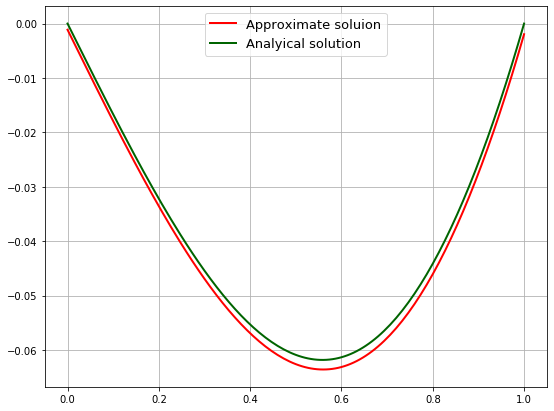

In [284]:
plt.figure(figsize = (9,7))
plt.plot(np.arange(a,b+h,h), solve, color = 'red', linewidth = 2, label = 'Approximate soluion')
plt.plot(xx, xx - np.array(yy), color = 'darkgreen', linewidth = 2, label = 'Analyical solution')
plt.legend(fontsize = 13, loc = 'upper center')
plt.grid(True)